In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics, model_selection

from sklearn.model_selection import cross_val_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

In [2]:
df = pd.read_csv('../Datos/sonar.csv')

# Tomamos todas las columnas menos la última
X = np.array(df.iloc[:, 0:-1])
Y = np.array(df.iloc[:,-1])

encoder = preprocessing.LabelEncoder()
Y = encoder.fit_transform(Y)

In [3]:
#nEj = X.shape[0]

#nomClases = pd.unique(df['class'])
#-- la red tendrá una salida para cada tipo de flor
#salidas = len(nomClases)

#-- la salida debe ser numérica --
#clase = df['class']

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( \
        X, Y, test_size=0.30) #, random_state=42)

Y_trainB = to_categorical(Y_train)

In [4]:
normalizarEntrada = 1  # 1 si normaliza; 0 si no

if normalizarEntrada:
    min_max_scaler = preprocessing.StandardScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)

### Definición del modelo

In [5]:
nIn = X_train.shape[1]
nOut = Y_trainB.shape[1]
ocultas = 5

model = Sequential()
model.add(Dense(ocultas, input_shape=[nIn], activation='tanh'))
model.add(Dense(nOut, activation='softmax'))

model.summary()  #-- muestra la cantidad de parámetros de la red


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 305       
                                                                 
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Configuración para entrenamiento
#-- se utilizará SGD (descenso de gradiente esticástico),
#-- MSE (error cuadrático medio) y ACCURACY como medida de performance
model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics='accuracy')


In [7]:
model.fit(X_train,Y_trainB, epochs=500) #, batch_size=20)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8943 - accuracy: 0.4966
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8923 - accuracy: 0.4966
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8903 - accuracy: 0.4966
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8884 - accuracy: 0.5034
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8864 - accuracy: 0.5034
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8844 - accuracy: 0.5034
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8824 - accuracy: 0.5034
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8805 - accuracy: 0.5034
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8786 - accuracy: 0.5034
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8766 - accuracy: 0.5034
Epoch 11/500
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 0.7611 - accuracy: 0.5517
Epoch 85/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7599 - accuracy: 0.5517
Epoch 86/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7587 - accuracy: 0.5517
Epoch 87/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7574 - accuracy: 0.5517
Epoch 88/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7562 - accuracy: 0.5517
Epoch 89/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7549 - accuracy: 0.5517
Epoch 90/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7537 - accuracy: 0.5586
Epoch 91/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7525 - accuracy: 0.5586
Epoch 92/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7512 - accuracy: 0.5586
Epoch 93/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7500 - accuracy: 0.5586
Epoch 94/500
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.5862
Epoch 168/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5862
Epoch 169/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5862
Epoch 170/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.5931
Epoch 171/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.5931
Epoch 172/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.5931
Epoch 173/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.5931
Epoch 174/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.5931
Epoch 175/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.5931
Epoch 176/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.5931
Epoch 177/500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.6552
Epoch 250/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6102 - accuracy: 0.6621
Epoch 251/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.6621
Epoch 252/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6090 - accuracy: 0.6621
Epoch 253/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.6621
Epoch 254/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.6621
Epoch 255/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.6621
Epoch 256/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.6621
Epoch 257/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.6621
Epoch 258/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6050 - accuracy: 0.6621
Epoch 259/500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.7310
Epoch 332/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5629 - accuracy: 0.7310
Epoch 333/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.7310
Epoch 334/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7241
Epoch 335/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.7241
Epoch 336/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7241
Epoch 337/500
5/5 [==============================] - 0s 3ms/step - loss: 0.5605 - accuracy: 0.7241
Epoch 338/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7241
Epoch 339/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.7241
Epoch 340/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.7241
Epoch 341/500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.7310
Epoch 414/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.7310
Epoch 415/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5275 - accuracy: 0.7310
Epoch 416/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.7379
Epoch 417/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.7379
Epoch 418/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7379
Epoch 419/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7379
Epoch 420/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7379
Epoch 421/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7379
Epoch 422/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5249 - accuracy: 0.7379
Epoch 423/500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.7586
Epoch 496/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.7586
Epoch 497/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4993 - accuracy: 0.7517
Epoch 498/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7517
Epoch 499/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4986 - accuracy: 0.7517
Epoch 500/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.7517


In [8]:
# predecir la salida del modelo
Y_pred = model.predict(X_train)
Y_pred_nro = np.argmax(Y_pred,axis=1)  #-- conversión a entero

print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_train, Y_pred_nro))


5/5 [==============================] - 0s 1ms/step
% aciertos X_train : 0.752


In [9]:
report = metrics.classification_report(Y_train, Y_pred_nro)
print("Confusion matrix Training:\n%s" % report) 

MM = metrics.confusion_matrix(Y_train, Y_pred_nro)
print("Confusion matrix:\n%s" % MM)

Confusion matrix Training:
              precision    recall  f1-score   support

           0       0.75      0.81      0.77        77
           1       0.76      0.69      0.72        68

    accuracy                           0.75       145
   macro avg       0.75      0.75      0.75       145
weighted avg       0.75      0.75      0.75       145

Confusion matrix:
[[62 15]
 [21 47]]


5/5 [==============================] - 0s 1ms/step


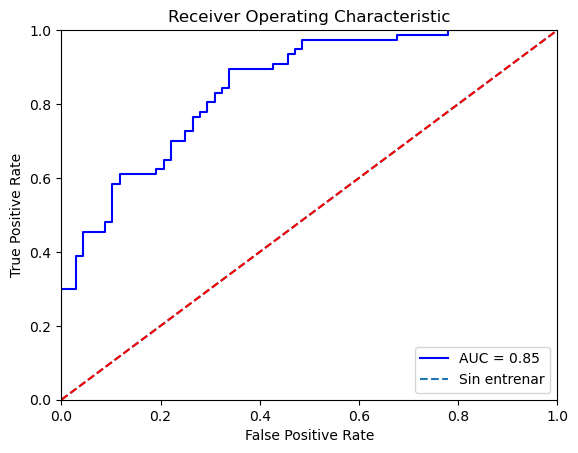

In [10]:
#--- AUC ---
clase_positiva=0  #-- la 1ra. columna corresponde a MINE
Y_pred = model.predict(X_train)
Y_proba = Y_pred[:,clase_positiva]

Y_positivo = Y_trainB[:,clase_positiva]
fpr, tpr, threshold = metrics.roc_curve(Y_positivo, Y_proba)
roc_auc = metrics.auc(fpr, tpr)

#Generamos un clasificador sin entrenar , que asignará 0 a todo
siempre_0 = np.zeros(Y_positivo.shape)
ns_fpr, ns_tpr, _ = metrics.roc_curve(Y_positivo,siempre_0)


# method I: plt
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()